# Nonlinear Regression with TensorFit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorfit import TensorFunction

In [2]:
# generate some experimental data
x = np.linspace(0, 50, 1000)
y = 9.8 * np.cos(x) * np.sin(x) ** 2 + 6 * np.sin(x) + 0.466 * np.random.randn(*x.shape)

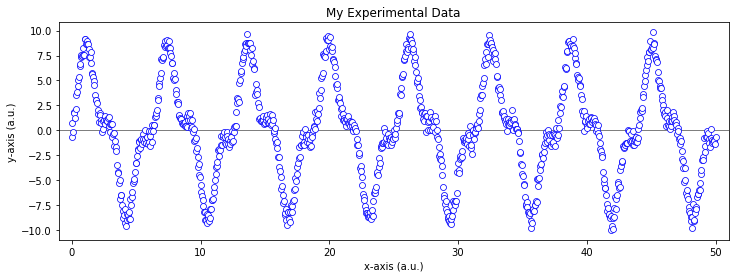

In [3]:
# make a plot of the data
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("My Experimental Data")
ax.scatter(x, y, edgecolor="blue", color="white", lw=0.75, label="data", zorder=2)
ax.axhline(y=0, color="black", lw=0.5, zorder=1)
ax.set_ylabel("y-axis (a.u.)")
ax.set_xlabel("x-axis (a.u.)")
ax.set_xlim([x.min() - 1, x.max() + 1])
plt.show()

In [4]:
# generate tensor function
tfunc = TensorFunction()
# define your fitting function
func = "self.A * tf.cos(self.X) * tf.sin(self.X) ** 2 + self.B * tf.sin(self.X) + self.C"
# choose a set of initial parameters
params = {"A": 4, "B": 5, "C": 0.8}
# initialize tensor function
tfunc.initialize(func, params)
# fit your function to the data
tfunc.fit(x, y)

In [5]:
# take a look at the fitting
print("Function Parameters: ", tfunc.Params)
print("Fitting Summary: ", tfunc.Summary)

Function Parameters:  {'A': 4.6865563, 'B': 5.62526, 'C': 0.10549635}
Fitting Summary:  {'mse': 1.9488714, 'r2': 0.9196312874555588}


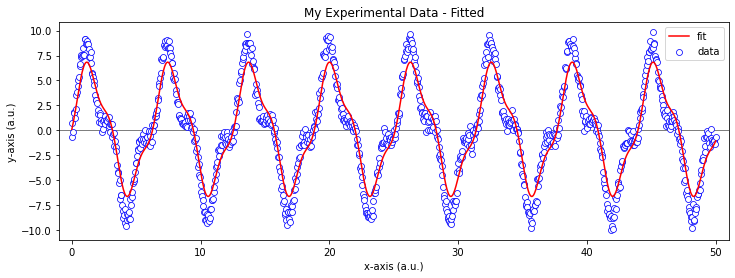

In [6]:
# make a plot of the initial fit with the data
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("My Experimental Data - Fitted")
ax.scatter(x, y, edgecolor="blue", color="white", lw=0.75, label="data", zorder=2)
yhat = tfunc.Params["A"] * np.cos(x) * np.sin(x) ** 2 + tfunc.Params["B"] * np.sin(x) + tfunc.Params["C"]
ax.plot(x, yhat, color="red", label="fit", zorder=3)
ax.axhline(y=0, color="black", lw=0.5, zorder=1)
ax.set_ylabel("y-axis (a.u.)")
ax.set_xlabel("x-axis (a.u.)")
ax.set_xlim([x.min() - 1, x.max() + 1])
ax.legend()
plt.show()

In [7]:
# reset and re-fit to improve the results
tfunc.reset()
tfunc.initialize(func, params)
tfunc.fit(x, y, num_rounds=10000, early_stopping_rounds=20, learning_rate=0.005)

Fitting until error does not improve for 20 rounds.


In [8]:
# take a look at the fitting
print("Function Parameters: ", tfunc.Params)
print("Fitting Summary: ", tfunc.Summary)

Function Parameters:  {'A': 9.804648, 'B': 5.9840736, 'C': -0.00051522197}
Fitting Summary:  {'mse': 0.22171704, 'r2': 0.990856702439487}


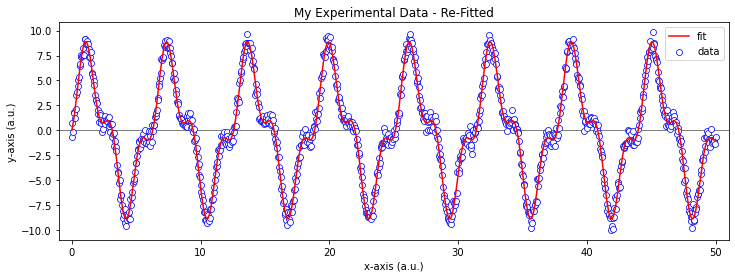

In [9]:
# make a plot of the initial fit with the data
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("My Experimental Data - Re-Fitted")
ax.scatter(x, y, edgecolor="blue", color="white", lw=0.75, label="data", zorder=2)
yhat = tfunc.Params["A"] * np.cos(x) * np.sin(x) ** 2 + tfunc.Params["B"] * np.sin(x) + tfunc.Params["C"]
ax.plot(x, yhat, color="red", label="fit", zorder=3)
ax.axhline(y=0, color="black", lw=0.5, zorder=1)
ax.set_ylabel("y-axis (a.u.)")
ax.set_xlabel("x-axis (a.u.)")
ax.set_xlim([x.min() - 1, x.max() + 1])
ax.legend()
plt.show()